# Heart Failure Prediction
**11 clinical features for predicting heart disease events.**

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]



In the given study, we have a binary classification problem.
We will make a prection on the target variable HeartDisease
Lastly we will build a variety of Classification models and compare the models giving the best prediction on Heart Disease.

# Importing libraries 

In [128]:
# Import Dependencies
%matplotlib inline


# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')


# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize


# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset 

In [5]:
train_data = pd.read_csv(r"HeartFailDataset\Heart.csv")
train_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# EDA + Visualization

In [8]:
# 918 rows, 12 columns
train_data.shape

(918, 12)

In [9]:
# there is no null values in our dataset
train_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
#only take numerical columns
train_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [30]:
train_data.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [37]:
hd = train_data.corr()["HeartDisease"]
hd = pd.DataFrame(hd)
hd

,HeartDisease
Age,0.282039
RestingBP,0.107589
Cholesterol,-0.232741
FastingBS,0.267291
MaxHR,-0.400421
Oldpeak,0.403951
HeartDisease,1.000000


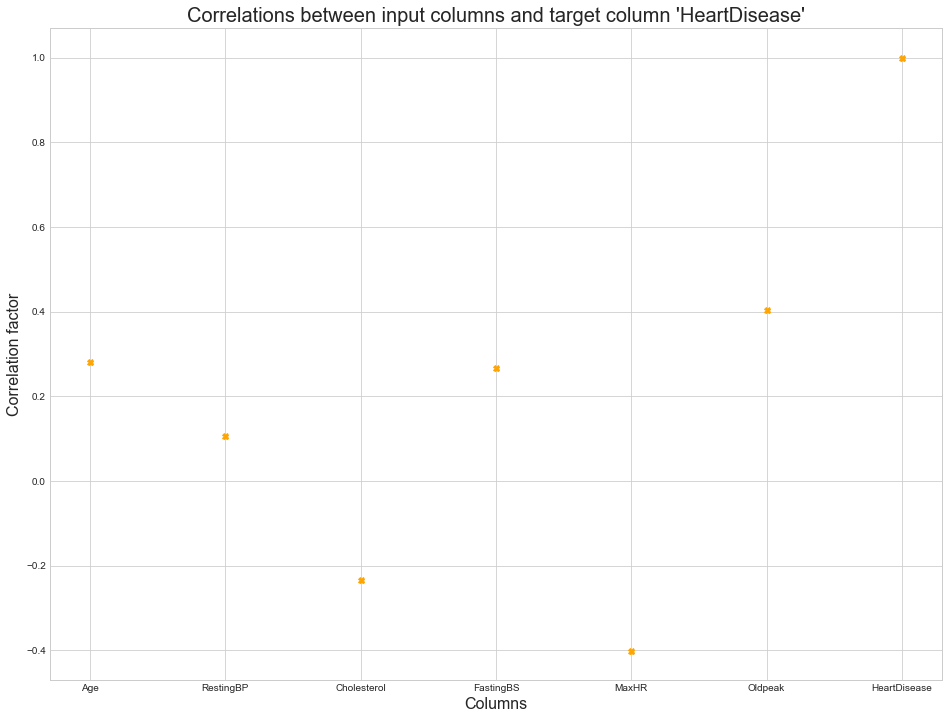

In [38]:
%matplotlib inline

plt.figure(figsize = (16, 12))
plt.title("Correlations between input columns and target column 'HeartDisease'", fontsize = 20)
plt.xlabel("Columns", fontsize = 16)
plt.ylabel("Correlation factor", fontsize = 16)
plt.plot(hd, color = "orange", linestyle = "", marker = "X")
plt.show()

### Lets go feature by feature 

# 1.  Age

In [15]:
# NO null values

# there is nothing to do with age column so we leave it 

train_data["Age"].isnull().sum()

0

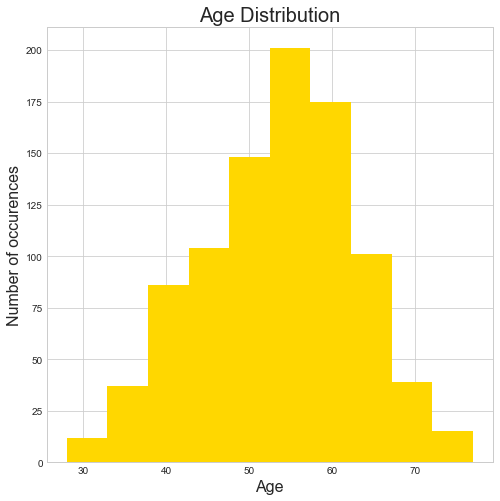

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
plt.title("Age Distribution", fontsize = 20)
plt.xlabel("Age", fontsize = 16)
plt.ylabel("Number of occurences", fontsize = 16)
plt.hist(train_data["Age"], color = "gold")
plt.show()

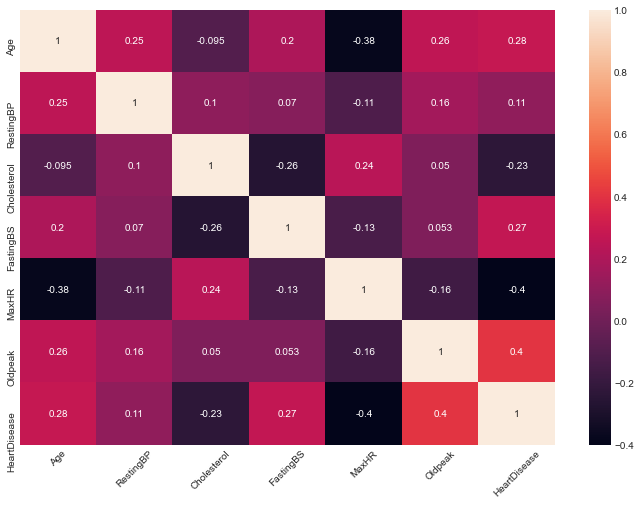

In [70]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True)
plt.xticks(rotation=45);

In [40]:
pd.crosstab(train_data["Age"], train_data["HeartDisease"])

HeartDisease,0,1
Age,,
28,1,0
29,3,0
30,1,0
31,1,1
32,3,2
33,1,1
34,5,2
35,7,4
36,4,2


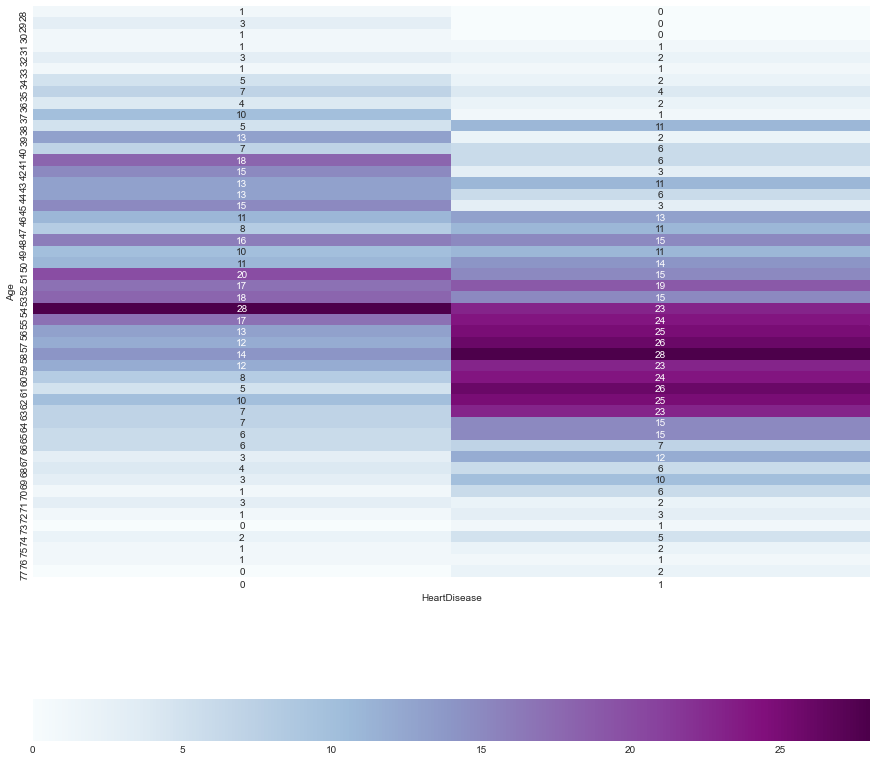

In [60]:
plt.figure(figsize = (15,15))
sns.heatmap(pd.crosstab(train_data["Age"], train_data["HeartDisease"]), annot = True,cbar = True,fmt = "g", cmap = "BuPu",cbar_kws={'orientation': 'horizontal'})
plt.show()

# Lets first see all categorical features

# 2. SEX

In [72]:
train_data["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [50]:
pd.crosstab(train_data["Sex"], train_data["HeartDisease"])

HeartDisease,0,1
Sex,,
F,143,50
M,267,458


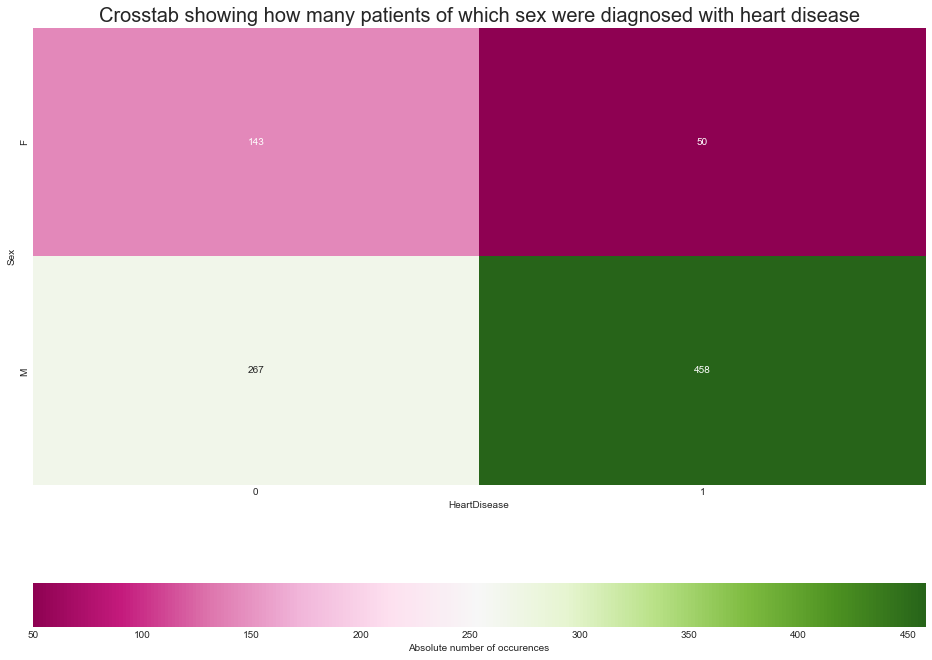

In [58]:
ct = pd.crosstab(train_data["Sex"], train_data["HeartDisease"])

plt.figure(figsize = (16, 12))
plt.title("Crosstab showing how many patients of which sex were diagnosed with heart disease", fontsize = 20)
sns.heatmap(ct, cmap = "PiYG", annot = True, cbar = True, fmt = "g", cbar_kws={'label': 'Absolute number of occurences', 'orientation': 'horizontal'})

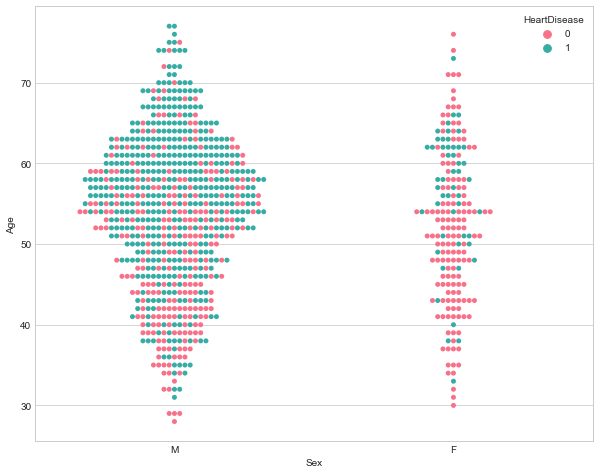

In [79]:
plt.figure(figsize = (10, 8))
sns.swarmplot(y="Age", x="Sex", hue="HeartDisease", data=train_data, palette="husl")
plt.show()

# 3. ChestPainType

In [61]:
train_data["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

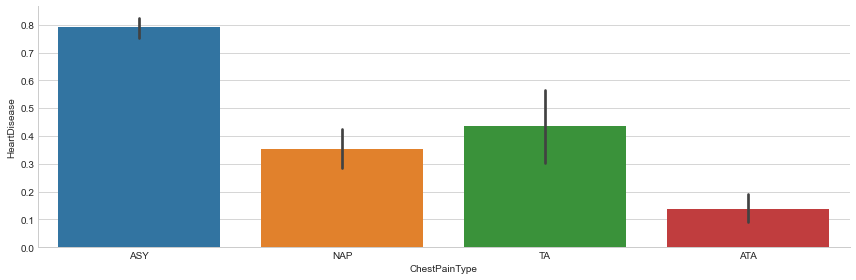

In [69]:
# 

sns.catplot(y = "HeartDisease", x = "ChestPainType", data = train_data.sort_values("HeartDisease", ascending = False), kind="bar", height = 4, aspect = 3)
plt.show()

In [87]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
train_data['ChestPainType'].iplot(kind='hist')

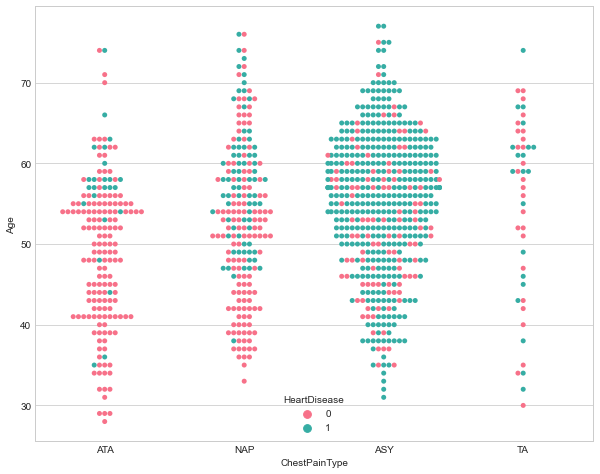

In [85]:
plt.figure(figsize = (10, 8))
sns.swarmplot(y="Age", x="ChestPainType", hue="HeartDisease", data=train_data, palette="husl");

In [88]:
train_data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# 3.RestingECG

In [89]:
train_data["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [90]:
train_data['RestingECG'].iplot(kind='hist')

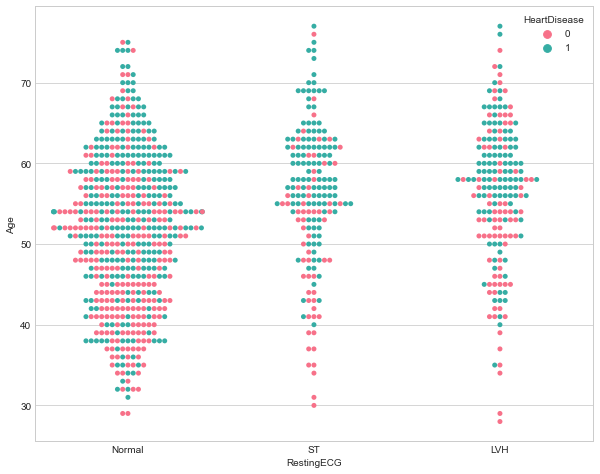

In [92]:
plt.figure(figsize = (10, 8))
sns.swarmplot(y="Age", x="RestingECG", hue="HeartDisease", data=train_data, palette="husl");

# 4.ExerciseAngina

In [93]:
train_data["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [94]:
train_data['ExerciseAngina'].iplot(kind='hist')

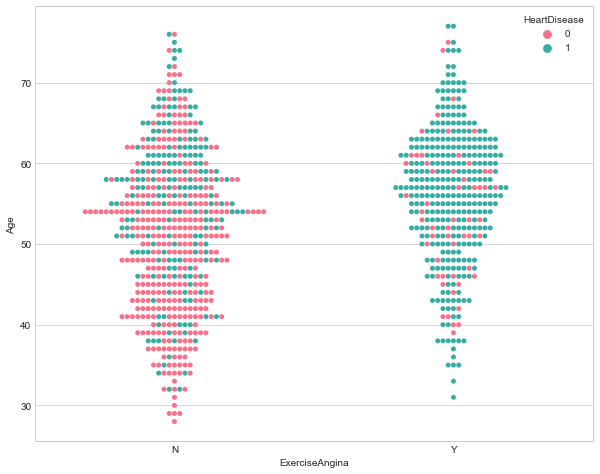

In [95]:
plt.figure(figsize = (10, 8))
sns.swarmplot(y="Age", x="ExerciseAngina", hue="HeartDisease", data=train_data, palette="husl");

# 5.ST_Slope

In [96]:
train_data["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [97]:
train_data['ST_Slope'].iplot(kind='hist')

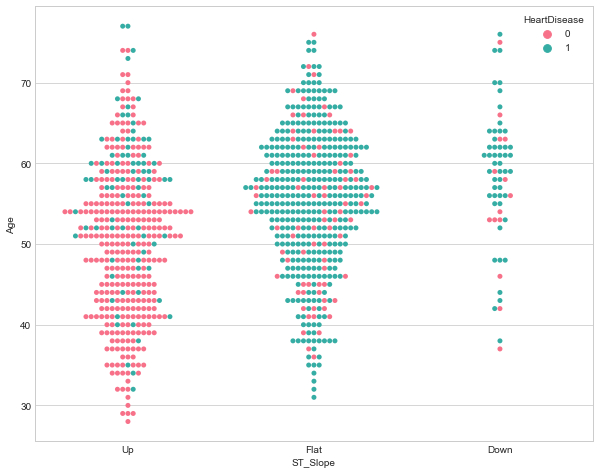

In [99]:
plt.figure(figsize = (10, 8))
sns.swarmplot(y="Age", x="ST_Slope", hue="HeartDisease", data=train_data, palette="husl")

# Numerical Features

In [101]:
numerical= train_data.drop(['HeartDisease'], axis=1).select_dtypes('number').columns
train_data[numerical].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


In [102]:
train_data[numerical].iplot(kind='hist');

In [103]:
train_data[numerical].iplot(kind='histogram', subplots=True,bins=50)

In [104]:
for i in numerical:
    train_data[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

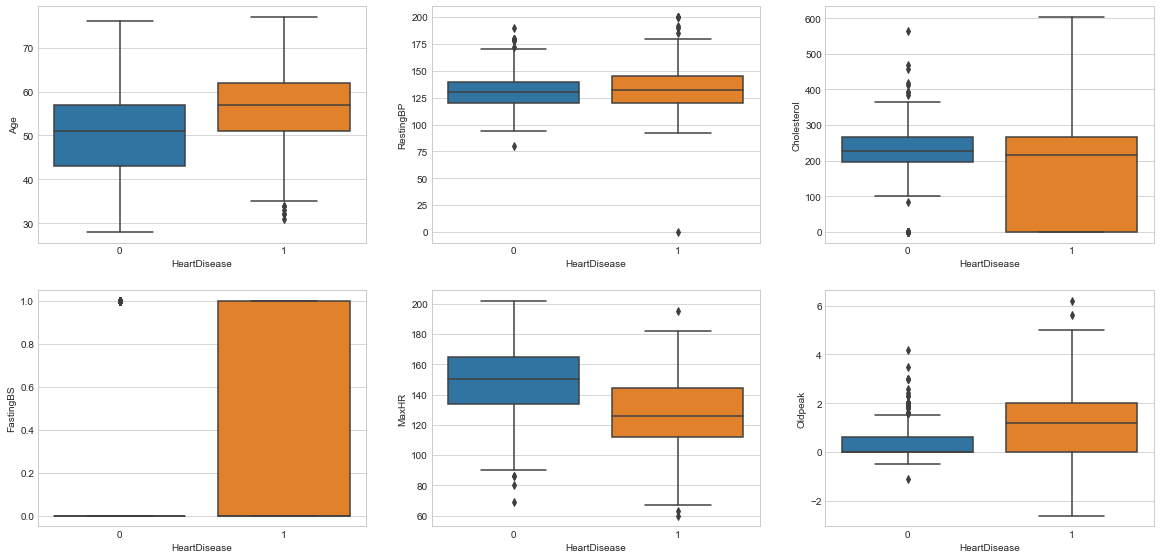

In [105]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "HeartDisease":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='HeartDisease', y=feature, data=train_data)

In [107]:
import plotly.express as px
fig = px.scatter_3d(train_data, 
                    x='RestingBP',
                    y='Age',
                    z='Sex',
                    color='HeartDisease')
fig.show();

# The Examination of Skewness & Kurtosis

In [108]:
skew_vals = train_data.skew().sort_values(ascending=False)
skew_vals

FastingBS       1.264484
Oldpeak         1.022872
RestingBP       0.179839
MaxHR          -0.144359
Age            -0.195933
HeartDisease   -0.215086
Cholesterol    -0.610086
dtype: float64

In [110]:
skew_limit = 0.5 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = train_data.skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols 

FastingBS      1.264484
Oldpeak        1.022872
Cholesterol   -0.610086
dtype: float64

In [112]:
#Interpreting Skewness 

for skew in skew_vals:
    if -0.5 < skew < 0.5:
        print ("A skewness value of", skew, "means that the distribution is approx: symmetric")
    elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
        print ("A skewness value of", skew, "means that the distribution is approx: moderately skewed")
    else:
        print ("A skewness value of", skew,"means that the distribution is approx: highly skewed")

A skewness value of -0.19593302867569365 means that the distribution is approx: symmetric
A skewness value of 0.1798393100516288 means that the distribution is approx: symmetric
A skewness value of -0.6100864307268192 means that the distribution is approx: highly skewed
A skewness value of 1.2644841750727027 means that the distribution is approx: highly skewed
A skewness value of -0.14435941846180994 means that the distribution is approx: symmetric
A skewness value of 1.0228720218107528 means that the distribution is approx: highly skewed
A skewness value of -0.21508633825088655 means that the distribution is approx: symmetric


In [114]:
kurtosis_vals = train_data.kurtosis().sort_values(ascending=False)
kurtosis_vals

RestingBP       3.271251
Oldpeak         1.203064
Cholesterol     0.118208
Age            -0.386140
FastingBS      -0.401960
MaxHR          -0.448248
HeartDisease   -1.958008
dtype: float64

In [115]:
#Calculating Kurtosis 

kurtosis_limit = 7 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
kurtosis_vals = train_data.kurtosis()
kurtosis_cols = kurtosis_vals[abs(kurtosis_vals) > kurtosis_limit].sort_values(ascending=False)
kurtosis_cols

Series([], dtype: float64)

# Multicollinearity

In [116]:
df_temp = train_data.corr()

count = "Done"
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(f"[1mmulticolinearity alert in between {col} - {i}")
        else:
            print(f"For {col} and {i}, there is NO multicollinearity problem") 

print("The number of strong corelated features:", count) 

For Age and Age, there is NO multicollinearity problem
For Age and RestingBP, there is NO multicollinearity problem
For Age and Cholesterol, there is NO multicollinearity problem
For Age and FastingBS, there is NO multicollinearity problem
For Age and MaxHR, there is NO multicollinearity problem
For Age and Oldpeak, there is NO multicollinearity problem
For Age and HeartDisease, there is NO multicollinearity problem
For RestingBP and Age, there is NO multicollinearity problem
For RestingBP and RestingBP, there is NO multicollinearity problem
For RestingBP and Cholesterol, there is NO multicollinearity problem
For RestingBP and FastingBS, there is NO multicollinearity problem
For RestingBP and MaxHR, there is NO multicollinearity problem
For RestingBP and Oldpeak, there is NO multicollinearity problem
For RestingBP and HeartDisease, there is NO multicollinearity problem
For Cholesterol and Age, there is NO multicollinearity problem
For Cholesterol and RestingBP, there is NO multicolline

# Categorical Feature Handling

In [118]:
train_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [120]:
train_data.shape

(918, 12)

In [121]:
train_data = pd.get_dummies(train_data, drop_first=True)

In [122]:
train_data.shape

(918, 16)

In [123]:
train_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


# Train Test Split

In [124]:
X = train_data.drop(["HeartDisease"], axis=1)
y = train_data["HeartDisease"]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify = y, random_state = 101)

In [129]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [130]:
X_train_scaled = scaler.fit_transform(X_train)

In [131]:
X_test_scaled = scaler.transform(X_test)

In [132]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [133]:
selection.feature_importances_

array([0.06000722, 0.06953137, 0.10052591, 0.04366454, 0.06828526,
       0.06286104, 0.0461527 , 0.01966498, 0.02575735, 0.01333472,
       0.02031426, 0.01564856, 0.05415003, 0.01301377, 0.3870883 ])

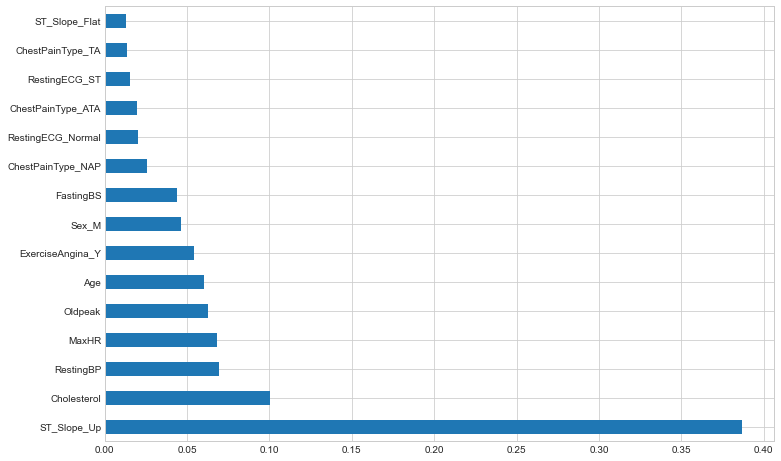

In [134]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()